______  ___     ______                        _________
___   |/  /________  /_______ _______ ______________  /
__  /|_/ /_  __ \_  __ \  __ `/_  __ `__ \  _ \  __  / 
_  /  / / / /_/ /  / / / /_/ /_  / / / / /  __/ /_/ /  
/_/  /_/  \____//_/ /_/\__,_/ /_/ /_/ /_/\___/\__,_/   
                                                       
_____________ _________      ___________        _________            
___    |__  /_______  /_____ ___  /__  /_______ ______  /____________
__  /| |_  __ \  __  /_  __ `/_  /__  //_/  __ `/  __  /_  _ \_  ___/
_  ___ |  /_/ / /_/ / / /_/ /_  / _  ,<  / /_/ // /_/ / /  __/  /    
/_/  |_/_.___/\__,_/  \__,_/ /_/  /_/|_| \__,_/ \__,_/  \___//_/     
                                                                     



# **Imports**

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.utils.vis_utils import plot_model

## Reading Data

In [3]:
columns = list()
with open(r"C:\Users\Mohamed\OneDrive\Desktop\KDD cpu1999\kddcup.names","r") as file:
    contents = file.readlines()
    for line in contents[1:]:
        columns.append(line.split(":")[0])

data = pd.read_csv(r"C:\Users\Mohamed\OneDrive\Desktop\KDD cpu1999\kddcup.data_10_percent\kddcup.data_10_percent", names= columns)
data["dst_host_srv_rerror_rate"] = data["dst_host_srv_rerror_rate"].str.strip(".")
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,tcp,http,SF,181,5450,0,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
0,tcp,http,SF,239,486,0,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
0,tcp,http,SF,235,1337,0,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
0,tcp,http,SF,219,1337,0,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
0,tcp,http,SF,217,2032,0,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,http,SF,310,1881,0,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
0,tcp,http,SF,282,2286,0,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
0,tcp,http,SF,203,1200,0,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
0,tcp,http,SF,291,1200,0,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [4]:
# # remove attribute 'difficulty_level'
# train_data.drop(['difficulty'],axis=1,inplace=True)
# train_data.shape

train_data = data

## Data Type Checking and Statistical Reports

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494021 entries, 0 to 0
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  object 
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  int64  
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13  root

In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
flag,494021.0,3025.610296,988218.101045,0.0,45.00,520.0,1032.00,693375640.0
src_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
dst_bytes,494021.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
land,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
wrong_fragment,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
hot,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
num_failed_logins,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
logged_in,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0
num_compromised,494021.0,0.000111,0.010551,0.0,0.00,0.0,0.00,1.0


# **Data Analysis**


*   Data Visualization
*   Data Mining



### Label

In [7]:
# number of attack labels 
train_data['dst_host_srv_rerror_rate'].value_counts()

smurf              280790
neptune            107201
normal              97278
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: dst_host_srv_rerror_rate, dtype: int64

In [8]:
# changing attack labels to their respective attack class
def change_label(df):
  df.iloc[:,-1].replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.iloc[:,-1].replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.iloc[:,-1].replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.iloc[:,-1].replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)


In [9]:
change_label(train_data)

In [10]:
# distribution of attack classes
train_data['dst_host_srv_rerror_rate'].value_counts()

Dos       391458
normal     97278
Probe       4107
R2L         1126
U2R           52
Name: dst_host_srv_rerror_rate, dtype: int64

### Protocol

In [11]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data["dst_host_srv_rerror_rate"])

In [12]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

numeric_col = multi_data.select_dtypes(include='number').columns
data = standardization(multi_data,numeric_col)

In [13]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,tcp,http,SF,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,4
0,tcp,http,SF,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,4
0,tcp,http,SF,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,4
0,tcp,http,SF,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,4
0,tcp,http,SF,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,http,SF,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.599396,-0.282867,-1.229844,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,normal,4
0,tcp,http,SF,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.599396,-0.282867,-0.897417,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,normal,4
0,tcp,http,SF,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.599396,-0.282867,-1.125961,1.028094,-0.306769,-0.436950,-0.25204,-0.249464,normal,4
0,tcp,http,SF,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.599396,-0.282867,-1.167514,1.028094,-0.359318,-0.436950,-0.25204,-0.249464,normal,4


In [14]:
multi_data.drop(labels= ['dst_host_srv_rerror_rate'], axis=1, inplace=True)
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,intrusion
0,tcp,http,SF,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-1.694315,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
0,tcp,http,SF,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-1.600011,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
0,tcp,http,SF,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-1.505707,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
0,tcp,http,SF,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-1.411403,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
0,tcp,http,SF,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-1.317100,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,http,SF,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.625558,0.599396,-0.282867,-1.229844,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,4
0,tcp,http,SF,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.625558,0.599396,-0.282867,-0.897417,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,4
0,tcp,http,SF,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.625558,0.599396,-0.282867,-1.125961,1.028094,-0.306769,-0.436950,-0.25204,-0.249464,4
0,tcp,http,SF,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.625558,0.599396,-0.282867,-1.167514,1.028094,-0.359318,-0.436950,-0.25204,-0.249464,4


In [15]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['duration','protocol_type','service'],prefix="",prefix_sep="")  
multi_data

,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,0,0,0,0,0,0,0,0,1,0
0,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,0,0,0,0,0,0,0,0,1,0
0,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,0,0,0,0,0,0,0,0,1,0
0,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,0,0,0,0,0,0,0,0,1,0
0,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,0,0,0,0,0,0,0,0,1,0
0,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,0,0,0,0,0,0,0,0,1,0
0,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,0,0,0,0,0,0,0,0,1,0
0,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,0,0,0,0,0,0,0,0,1,0


In [16]:
for counter in multi_data.columns:
    print(counter)

flag
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
intrusion
icmp
tcp
udp
IRC
X11
Z39_50
auth
bgp
courier
csnet_ns
ctf
daytime
discard
domain
domain_u
echo
eco_i
ecr_i
efs
exec
finger
ftp
ftp_data
gopher
hostnames
http
http_443
imap4
iso_tsap
klogin
kshell
ldap
link
login
mtp
name
netbios_dgm
netbios_ns
netbios_ssn
netstat
nnsp
nntp
ntp_u
other
pm_dump
pop_2
pop_3
printer
private
red_i
remote_job
rje
shell
smtp
sql_net
ssh
sunrpc
supdup
systat
telnet
tftp_u
tim_i
time
urh_i
urp_i
uucp
uucp_path
vm

In [17]:
y_train_multi= multi_data[['intrusion']]
X_train_multi= multi_data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (494021, 117) 
y_train has shape: (494021, 1)


In [18]:
from sklearn.preprocessing import LabelBinarizer

y_train_multi = LabelBinarizer().fit_transform(y_train_multi)
y_train_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [19]:
X_train_multi = np.array(X_train_multi)
y_train_multi = np.array(y_train_multi)

In [20]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.20, random_state=42)

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(395216, 117, 1)

In [22]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(98805, 117, 1)

In [23]:
model = Sequential() # initializing model
# input layer and first layer with 50 neurons
model.add(Conv1D(32, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(4)))  
model.add(Dropout(0.2))
model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(4)))  
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))   

In [24]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# summary of model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 117, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 32)            0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 32)             0

In [26]:
# training the model on training dataset
history = model.fit(X_train, y_train, epochs=100, batch_size = 5000, validation_split = 0.2)

Epoch 1/100
64/64 [==============================] - 14s 199ms/step - loss: 0.5470 - accuracy: 0.8572 - val_loss: 0.1234 - val_accuracy: 0.9610
Epoch 2/100
64/64 [==============================] - 13s 196ms/step - loss: 0.1027 - accuracy: 0.9764 - val_loss: 0.0550 - val_accuracy: 0.9901
Epoch 3/100
64/64 [==============================] - 13s 197ms/step - loss: 0.0670 - accuracy: 0.9860 - val_loss: 0.0452 - val_accuracy: 0.9905
Epoch 4/100
64/64 [==============================] - 13s 197ms/step - loss: 0.0576 - accuracy: 0.9878 - val_loss: 0.0385 - val_accuracy: 0.9910
Epoch 5/100
64/64 [==============================] - 13s 198ms/step - loss: 0.0504 - accuracy: 0.9889 - val_loss: 0.0339 - val_accuracy: 0.9912
Epoch 6/100
64/64 [==============================] - 13s 198ms/step - loss: 0.0447 - accuracy: 0.9895 - val_loss: 0.0300 - val_accuracy: 0.9912
Epoch 7/100
64/64 [==============================] - 13s 198ms/step - loss: 0.0413 - accuracy: 0.9899 - val_loss: 0.0248 - val_accuracy:

In [27]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

3088/3088 [==============================] - 6s 2ms/step - loss: 0.0037 - accuracy: 0.9991
Test results - Loss: 0.0036504094023257494 - Accuracy: 99.90891218185425%


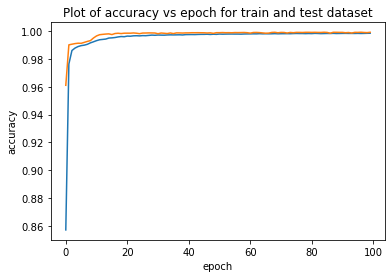

In [28]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

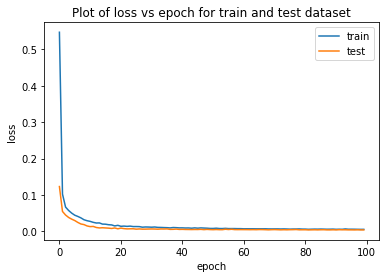

In [30]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()